In [1]:
## Problem 1: Set up Github and clone assignment repo. 


- Go to http://www.github.com and create an account.
- Send your Github username to dg2991@columbia.edu.
- Install Git - https://github.com/blog/1510-installing-git-from-github-for-mac. Make sure to install command line tools. 
- When I have received your email, you should get a confirmation that you have been added to the repo.
- Click on this link: https://classroom.github.com/assignment-invitations/11415026d0459793405d3c1ff95cc259
- Follow the instructions to clone that repo to your local machine.
- You should type a command like: 

```$ git clone https://github.com/Columbia-Intro-Data-Science/python-introduction-(your-github-username).git```


**Next:** Solve the problems directly in this notebook, and then push to the repo above (not to the course repo!)


The process should be to create a copy of this notebook, move it into the folder you created above. Then do this:

``` $ git add mynotebooksolutions.ipynb ```

``` $ git commit -m "added my homework" ```

``` $ git push origin master $ ```


## Problem 2: Sales Data Analysis

In [2]:
# read data into a DataFrame
import pandas as pd
import pylab as plt
import numpy as np
import seaborn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.formula.api as sm
import numpy.random as nprnd
import random
import json
pd.set_option('display.max_columns', 500)
%matplotlib inline

df = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9



#### What are the features?

- **TV:** advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- **Radio:** advertising dollars spent on Radio
- **Newspaper:** advertising dollars spent on Newspaper

#### Goal: Predict the number of sales in a given market based on the advertising in TV, Radio and Newspaper.


### Problem 2, Part 0: Plot box plots of the coefficient ranges

Use df.boxplot()

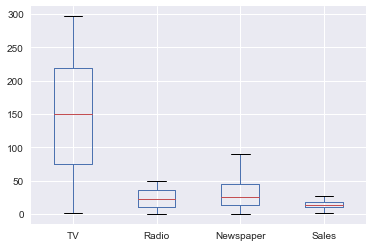

In [3]:
df.boxplot()

### Problem 2, Part 1: Create scatter plots using plt.scatter() 

Create scatter plots of the advertising dollars spent on TV, Radio and Newspaper to the total Sales dollars gained. Fill in the parameter for scatter() below, and simply 

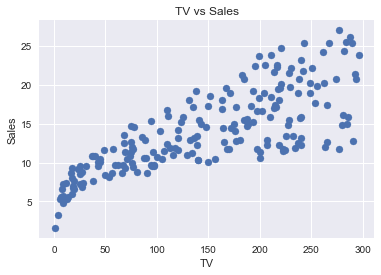

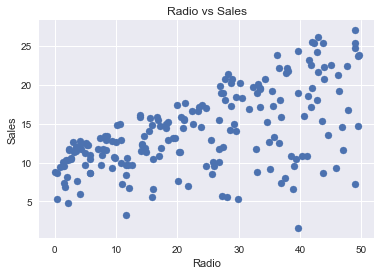

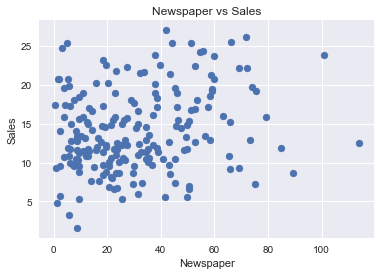

In [4]:
plt.title('TV vs Sales')
tv_sales = plt.scatter(df['TV'], df['Sales'])
plt.xlabel('TV')
plt.ylabel('Sales')
plt.figure()
plt.title('Radio vs Sales')
radio_sales = plt.scatter(df['Radio'], df['Sales'])
plt.xlabel('Radio')
plt.ylabel('Sales')
plt.figure()
plt.title('Newspaper vs Sales')
newspaper_sales = plt.scatter(df['Newspaper'], df['Sales'])
plt.xlabel('Newspaper')
plt.ylabel('Sales')

In [5]:
from pandas.tools.plotting import scatter_matrix 

Which of the variables seem correlated with one another? Which don't? Explain your answer

TV and Radio both seem correlated with Sales, as their respective scatter plots both show that sales increases as either TV or Radio increases. Newspaper and Sales do not seem correlated, because the scatter plot is distributed without any particularly trend.

### Probelm 2, Part 2: Predict sales using sklearn

- Split data into training and testing subsets.
- Train model using LinearRegression() from sklearn.linear_model on training data.
- Evaluate using RMSE and R^2 on testing set


If you need help, please refer to this example:

https://github.com/Columbia-Intro-Data-Science/APMAE4990-/blob/master/notebooks/Lecture%202%20-%20Regression%20Bookingdotcom%20Case%20Study.ipynb

See where I split the data into testing/training and evalaute performance. 

In [6]:
from sklearn.linear_model import LinearRegression

a) Set y to be the sales in df

In [7]:
y=df['Sales']

b) Set X to be just the features described above in df

In [8]:
X=df.ix[:,:-1]

c) Randomly split data into training and testing - 80% training, 20% testing.

In [9]:
size = len(df)

# scaler = StandardScaler()
# X = X.as_matrix().astype(np.float)
# X = scaler.fit_transform(X)

# Split the data into training/testing sets
X_train = X[0:int(size*0.8)]
X_test = X[int(size*0.8):]

# Split the targets into training/testing sets
y_train = y[0:int(size*0.8)]
y_test = y[int(size*0.8):]

d) Train model on training data, and make predictions on testing data

In [10]:
# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
fit = regr.fit(X_train, y_train)

predictions = regr.predict(X_test)

e) Evalute the R^2 on training data. Is this good? Bad? Why?

In [11]:
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((predictions - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X_test, y_test))

Residual sum of squares: 2.79
Variance score: 0.90


This is a good result, as a variance of 0.9 is very close to the perfect prediction score of 1. 

f) Make a scatter plot of your predictions vs the actual values on the testing data. Does it look like a good model?

It looks like a good model, the predictions and actual values look very highly correlated. 

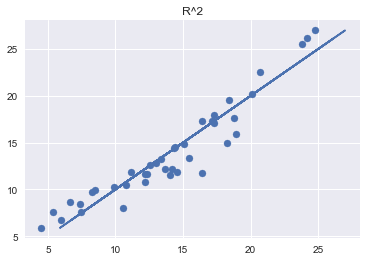

In [12]:
#plt.figure(figsize=(10,10))
plt.title('R^2')
plt.scatter(predictions,y_test)
plt.plot(y_test,y_test)

g) Can you measure the importance of features in this model? What is something you should check before making conclusions?

Try looking at LinearRegression().coef_

In [13]:
# The coefficients
print('Coefficients (TV, radio, newspaper): \n', regr.coef_)

Coefficients (TV, radio, newspaper): 
 [ 0.0472521   0.179922   -0.00094408]


h) What can you conclude from g) - can you think of a way to interpret the result? What should we have done to measure the importance of the features involved?

We can conclude that newspaper is not important in this model, as it has a negative coefficient. However, from g) it is difficult to find the relative importance of the positively correlated features, TV and radio, because we did not normalize the data beforehand. Below are the coefficients when we have normalized the data--they allow us to determine that TV is more important than radio as a feature in this model. 

In [14]:
scaler = StandardScaler()
X = X.as_matrix().astype(np.float)
X = scaler.fit_transform(X)

# Split the data into training/testing sets
X_train = X[0:int(size*0.8)]
X_test = X[int(size*0.8):]

# Split the targets into training/testing sets
y_train = y[0:int(size*0.8)]
y_test = y[int(size*0.8):]

regr = LinearRegression()
fit = regr.fit(X_train, y_train)

# The coefficients
print('Coefficients (TV, radio, newspaper): \n', regr.coef_)

Coefficients (TV, radio, newspaper): 
 [ 4.04663787  2.66458107 -0.02050924]


## How could you have improved performance?

*Hint:* Try plotting the data in three dimensions along with the hyperplane solution, and see if you can infer
a new variable which will help, or try a nonlinear/non-parametric model

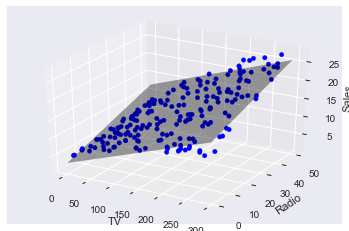

In [15]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.formula.api as sm
from matplotlib import cm

csv = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
model = sm.ols(formula='Sales ~ TV + Radio', data = csv)
fit = model.fit()

fit.summary()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x_surf = np.linspace(csv['TV'].min(), csv['TV'].max(), 100)                # generate a mesh
y_surf = np.linspace(csv['Radio'].min(), csv['Radio'].max(), 20)
# x_surf = np.arange(0, 350, 20)     
# y_surf = np.arange(0, 60, 4)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)

exog = pd.core.frame.DataFrame({'TV': x_surf.ravel(), 'Radio': y_surf.ravel()})
out = fit.predict(exog = exog)
ax.plot_surface(x_surf, y_surf,
                out.reshape(x_surf.shape),
                rstride=1,
                cstride=1,
                color='None',
                alpha = 0.4)

ax.scatter(csv['TV'], csv['Radio'], csv['Sales'],
           c='blue',
           marker='o',
           alpha=1)

ax.set_xlabel('TV')
ax.set_ylabel('Radio')
ax.set_zlabel('Sales')

plt.show()

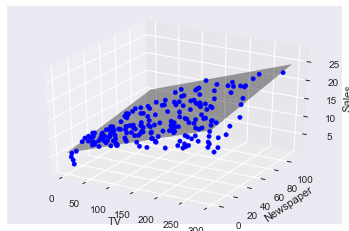

In [16]:
model = sm.ols(formula='Sales ~ TV + Newspaper', data = csv)
fit = model.fit()

fit.summary()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x_surf = np.linspace(csv['TV'].min(), csv['TV'].max(), 100)                # generate a mesh
y_surf = np.linspace(csv['Newspaper'].min(), csv['Newspaper'].max(), 20)
# x_surf = np.arange(0, 350, 20)     
# y_surf = np.arange(0, 60, 4)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)

exog = pd.core.frame.DataFrame({'TV': x_surf.ravel(), 'Newspaper': y_surf.ravel()})
out = fit.predict(exog = exog)
ax.plot_surface(x_surf, y_surf,
                out.reshape(x_surf.shape),
                rstride=1,
                cstride=1,
                color='None',
                alpha = 0.4)

ax.scatter(csv['TV'], csv['Newspaper'], csv['Sales'],
           c='blue',
           marker='o',
           alpha=1)

ax.set_xlabel('TV')
ax.set_ylabel('Newspaper')
ax.set_zlabel('Sales')

plt.show()

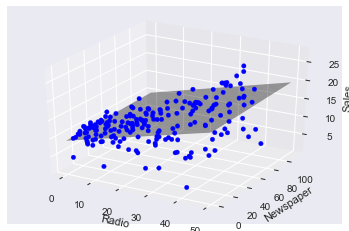

In [17]:
model = sm.ols(formula='Sales ~ Radio + Newspaper', data = csv)
fit = model.fit()

fit.summary()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x_surf = np.linspace(csv['Radio'].min(), csv['Radio'].max(), 100)                # generate a mesh
y_surf = np.linspace(csv['Newspaper'].min(), csv['Newspaper'].max(), 20)
# x_surf = np.arange(0, 350, 20)     
# y_surf = np.arange(0, 60, 4)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)

exog = pd.core.frame.DataFrame({'Radio': x_surf.ravel(), 'Newspaper': y_surf.ravel()})
out = fit.predict(exog = exog)
ax.plot_surface(x_surf, y_surf,
                out.reshape(x_surf.shape),
                rstride=1,
                cstride=1,
                color='None',
                alpha = 0.4)

ax.scatter(csv['Radio'], csv['Newspaper'], csv['Sales'],
           c='blue',
           marker='o',
           alpha=1)

ax.set_xlabel('Radio')
ax.set_ylabel('Newspaper')
ax.set_zlabel('Sales')

plt.show()

## Problem 3:  Gradient Descent and the learning rate

By modifying the learning rate below, show how the convergence takes longer or doesn't converge at all.
Can you explain in words or math why this is?

The convergence takes longer as the learning rate increases to around 0.0002. However, once the learning rate has surpassed this threshold, then the linear approximation implicit gradient descent is no longer valid, resulting in no convergence at all. Below can be found runs with increasing learning rate-- we can see how, eventually, the convergence takes shorter and shorter until the gradient descent no longer converges at all. 

In [18]:
from numpy import *

# y = mx + b
# m is slope, b is y-intercept
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    errorlist = []
    
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
        errorlist.append(compute_error_for_line_given_points(b,m,points))
    return [b, m, errorlist]

def run(num_iterations, learning_rate):
    points = genfromtxt("../APMAE4990-/data/data.csv", delimiter=",")
#     learning_rate = 0.0001
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = num_iterations
    print ('Starting gradient descent at b = {0}, m = {1}, error = {2}'.format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points)))
    print ("Running...")
    [b, m, errorlist] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print ("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))
    for i in range(0,len(points)):
        plt.scatter(points[i,0],points[i,1])
        plt.scatter(points[i,0],m*points[i,0]+b,color='r')
    return errorlist

Learning rate of 0.00005 takes 9 runs to converge

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 0 iterations b = 0, m = 0, error = 5565.107834483211


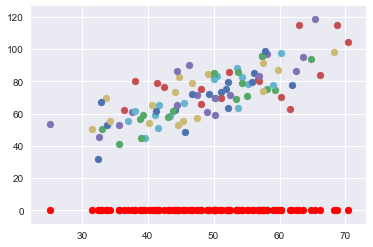

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 1 iterations b = 0.0072735050553686485, m = 0.3685351486795526, error = 3186.2669183340686


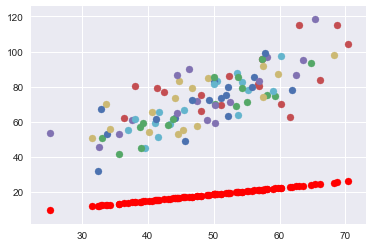

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 2 iterations b = 0.01274199579526775, m = 0.6452340122674316, error = 1845.2854193756275


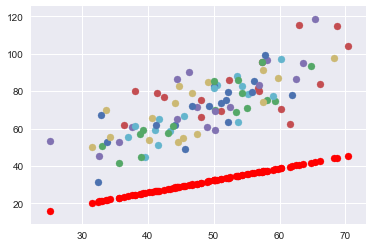

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 3 iterations b = 0.016855267941536783, m = 0.8529814900056218, error = 1089.3578680541548


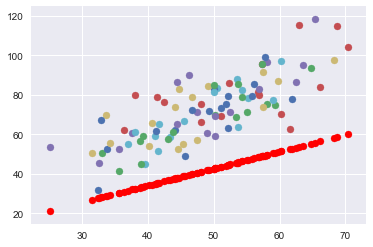

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 4 iterations b = 0.019951031565302785, m = 1.0089597394280754, error = 663.2323265001876


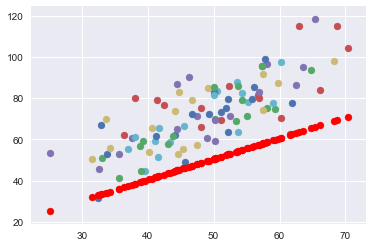

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 5 iterations b = 0.022282841973126334, m = 1.1260692559400733, error = 423.02017991777734


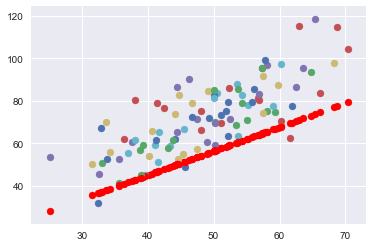

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 6 iterations b = 0.02404107043012985, m = 1.2139958302447225, error = 287.60967009381125


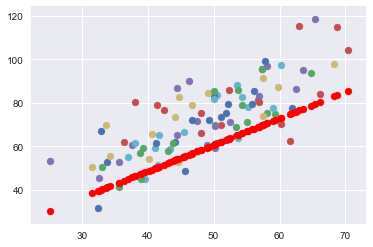

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 7 iterations b = 0.025368649139452446, m = 1.2800116281462905, error = 211.27711465249791


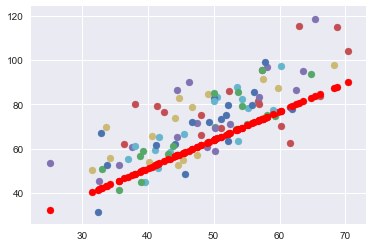

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 8 iterations b = 0.026372892693351885, m = 1.329576647398786, error = 168.24751899306284


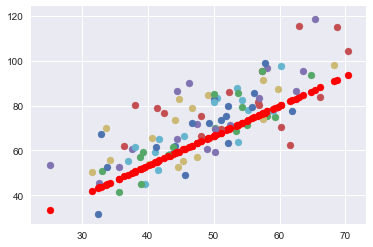

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 9 iterations b = 0.02713437370918469, m = 1.366790296112002, error = 143.99120588588545


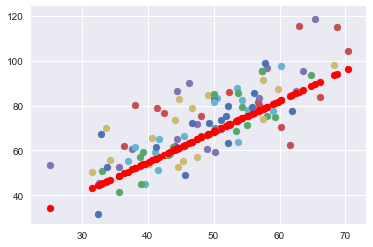

In [35]:
#learning rate of 0.00005

print("Learning rate of 0.00005 takes 9 runs to converge\n")
for num in range(0,10):
   run(num,0.00005)
   plt.show()

Learning rate of 0.0001 takes 8 runs to converge

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 0 iterations b = 0, m = 0, error = 5565.107834483211


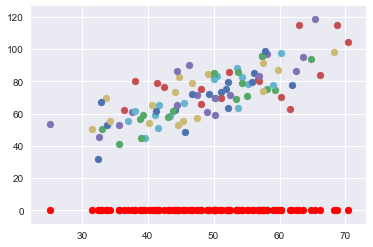

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 1 iterations b = 0.014547010110737297, m = 0.7370702973591052, error = 1484.586557408649


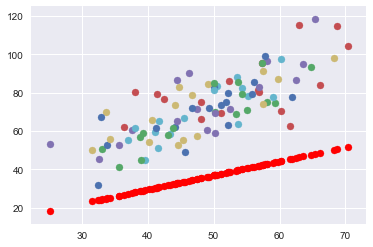

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 2 iterations b = 0.02187396295959641, m = 1.1067954543515157, error = 457.8542575737673


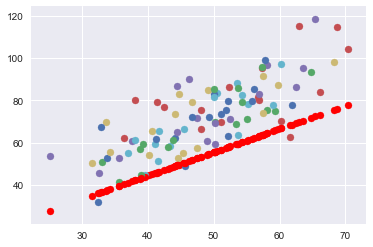

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 3 iterations b = 0.025579224321293136, m = 1.2922546649131115, error = 199.50998572553894


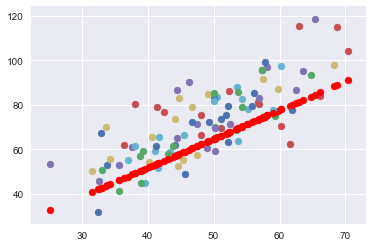

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 4 iterations b = 0.027467789559144355, m = 1.385283255651245, error = 134.50591058200533


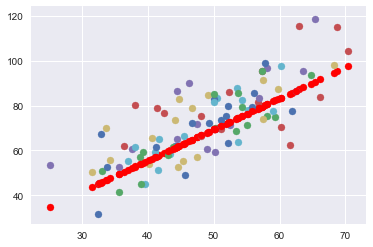

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 5 iterations b = 0.028445071981738963, m = 1.4319472323843205, error = 118.14969342239947


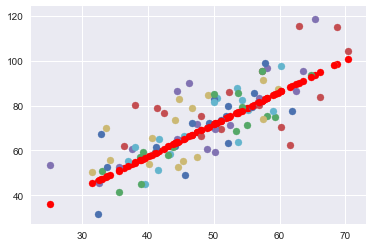

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 6 iterations b = 0.02896524076647862, m = 1.4553540088980408, error = 114.0341490603815


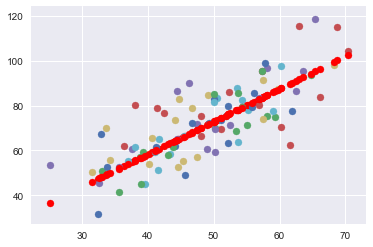

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 7 iterations b = 0.0292561141260467, m = 1.4670946177201354, error = 112.99857731713661


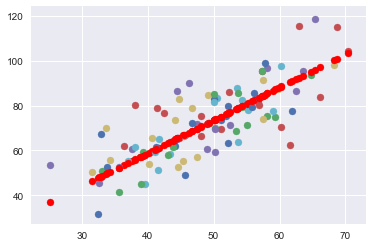

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 8 iterations b = 0.02943196916380713, m = 1.4729832982243762, error = 112.7379818756847


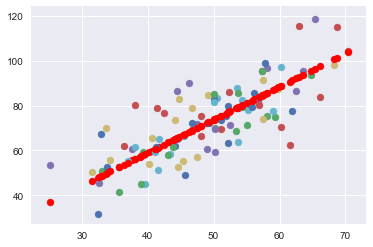

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 9 iterations b = 0.029550129024383073, m = 1.4759365618962286, error = 112.67238435909097


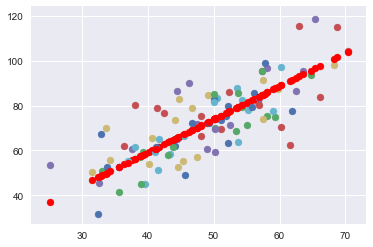

In [32]:
#learning rate of 0.0001

print("Learning rate of 0.0001 takes 8 runs to converge\n")
for num in range(0,10):
   run(num,0.0001)
   plt.show()

Learning rate of 0.0002 takes 2 runs to converge

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 0 iterations b = 0, m = 0, error = 5565.107834483211


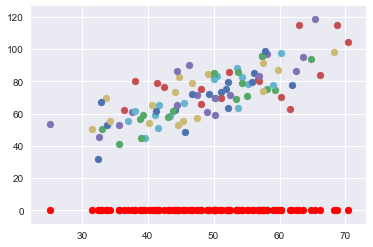

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 1 iterations b = 0.029094020221474594, m = 1.4741405947182105, error = 112.70750122899199


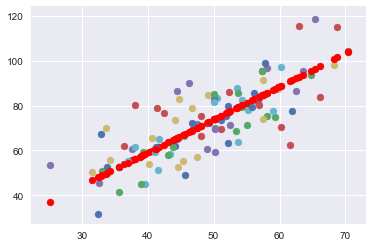

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 2 iterations b = 0.029307811395436454, m = 1.4789006279696415, error = 112.65052279457352


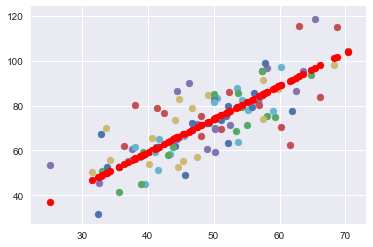

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 3 iterations b = 0.029428299719611955, m = 1.478913651241336, error = 112.65044995000876


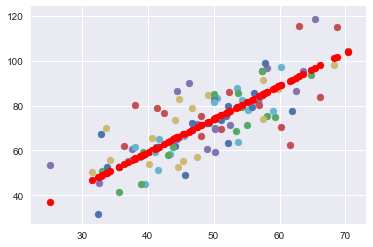

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 4 iterations b = 0.029548484809344765, m = 1.4789113387638853, error = 112.65037770154348


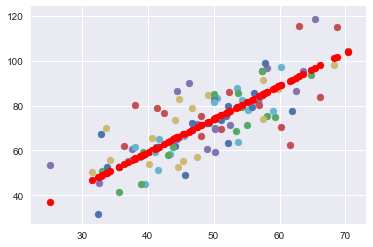

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 5 iterations b = 0.02966866711106594, m = 1.478908976778002, error = 112.65030545526567


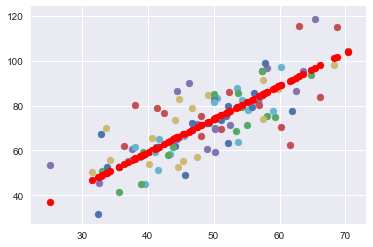

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 6 iterations b = 0.02978884759543099, m = 1.4789066146677181, error = 112.65023321116905


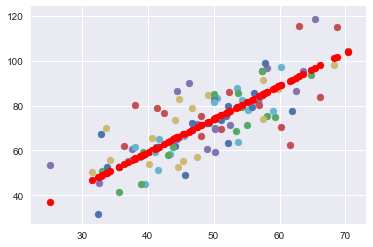

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 7 iterations b = 0.02990902626560303, m = 1.4789042525925749, error = 112.65016096925352


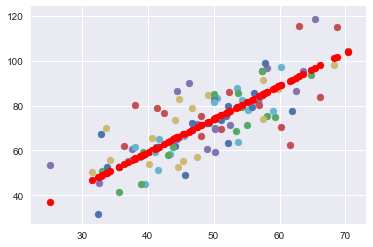

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 8 iterations b = 0.030029203121619573, m = 1.4789018905530862, error = 112.65008872951903


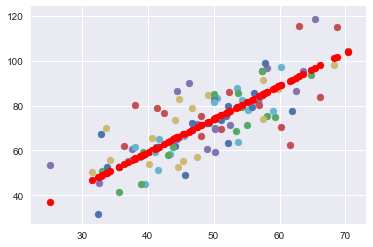

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 9 iterations b = 0.03014937816350804, m = 1.4788995285492539, error = 112.65001649196543


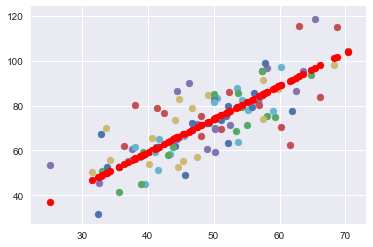

In [30]:
#learning rate of 0.0002

print("Learning rate of 0.0002 takes 2 runs to converge\n")

for num in range(0,10):
   run(num,0.0002)
   plt.show()

Learning rate of 0.0005 never converges

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 0 iterations b = 0, m = 0, error = 5565.107834483211


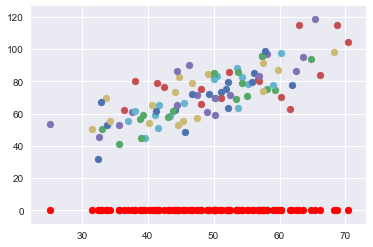

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 1 iterations b = 0.07273505055368648, m = 3.685351486795526, error = 12248.923658059466


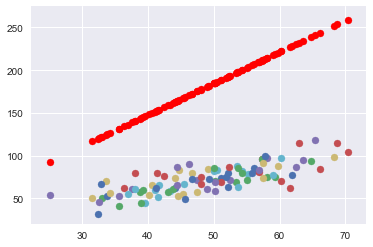

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 2 iterations b = -0.03503133043958161, m = -1.812925535576324, error = 27125.9989614646


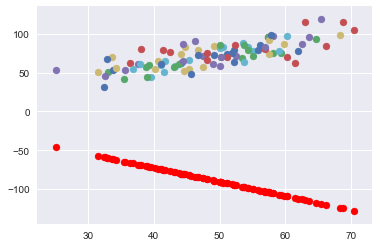

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 3 iterations b = 0.12649657885967047, m = 6.390068174869519, error = 60239.92274554496


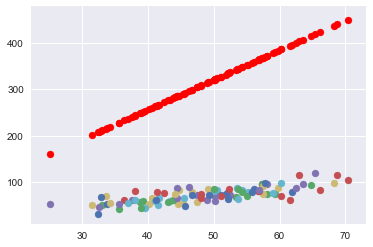

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 4 iterations b = -0.11374200683340807, m = -5.848185220212095, error = 133946.07277683076


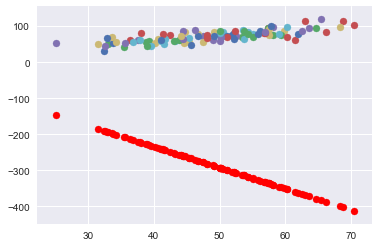

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 5 iterations b = 0.24542423466870028, m = 12.410337296692443, error = 298003.84433146904


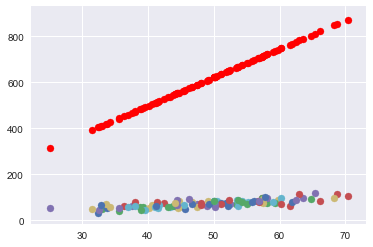

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 6 iterations b = -0.28967567003687617, m = -14.829995329449478, error = 663169.4699413386


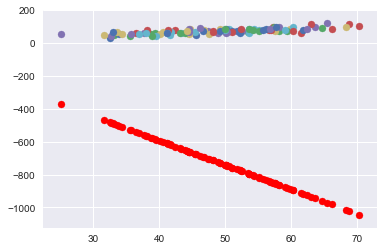

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 7 iterations b = 0.5094010313993653, m = 25.81048099761001, error = 1475968.1128761834


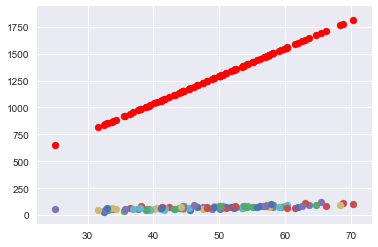

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 8 iterations b = -0.6820116610464277, m = -34.822013381765444, error = 3285124.253337868


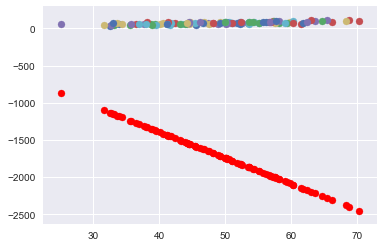

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 9 iterations b = 1.096233422691767, m = 55.6370121244165, error = 7312008.363935543


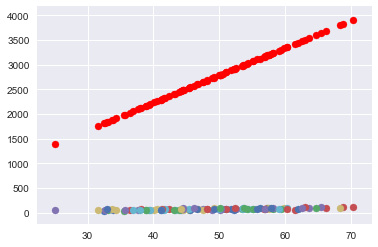

In [33]:
#learning rate of 0.0005

print("Learning rate of 0.0005 never converges\n")
for num in range(0,10):
   run(num,0.0005)
   plt.show()

Learning rate of 0.0005 did not converge.

## Problem 3 Part 2

Plot the error as a function of the number of iterations for various learning rates. Choose the rates
so that it tells a story.

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 100 iterations b = -3.1165582062514995e+58, m = -1.585655822608489e+60, error = 6.267874454306815e+123
Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 100 iterations b = -6887557902509816.0, m = -3.504281187420402e+17, error = 3.0612607979207772e+38
Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 100 iterations b = 0.03507497059234178, m = 1.4788027175308358, error = 112.64705664288809
Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 100 iterations b = 0.032071915131595685, m = 1.4788617416703924, error = 112.64886099788522
Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 100 iterations b = 0.02949361544713032, m = 1.4700028426067162, error = 112.84803925712856
Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 100 iter

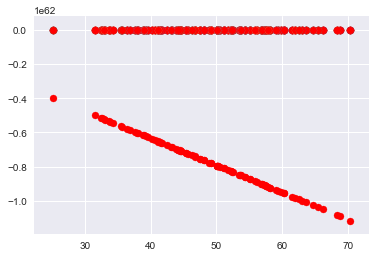

In [23]:
errorlist001 = run(100, 0.001)
errorlist0005 = run(100, 0.0005)
errorlist0001 = run(100, 0.0001)
errorlist00005 = run(100, 0.00005)
errorlist00001 = run(100, 0.00001)
errorlist000005 = run(100, 0.000005)
errorlist000001 = run(100,0.000001)
errorlist0000005 = run(100,0.0000005)

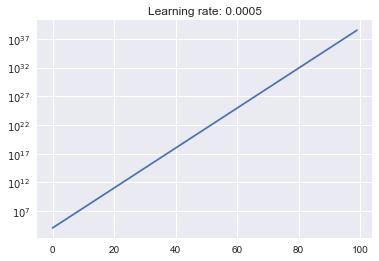

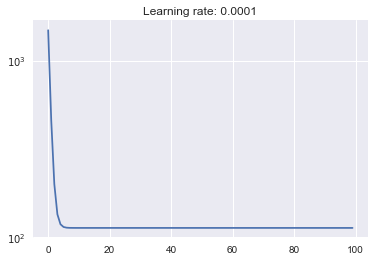

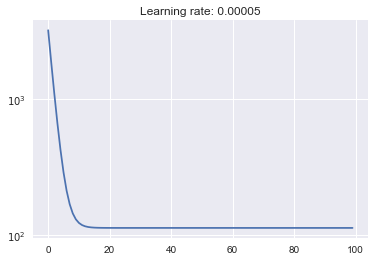

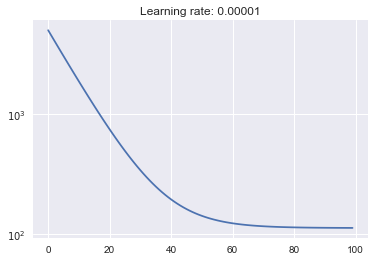

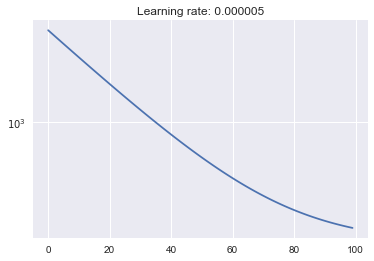

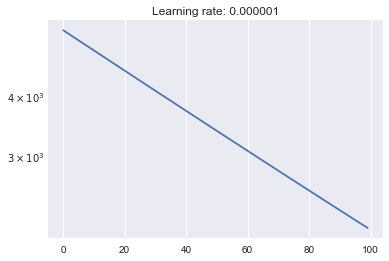

In [24]:
# Decreasing learning rates

plt.semilogy(errorlist0005)
plt.title('Learning rate: 0.0005')
plt.show()
plt.semilogy(errorlist0001)
plt.title('Learning rate: 0.0001')
plt.show()
plt.semilogy(errorlist00005)
plt.title('Learning rate: 0.00005')
plt.show()
plt.semilogy(errorlist00001)
plt.title('Learning rate: 0.00001')
plt.show()
plt.semilogy(errorlist000005)
plt.title('Learning rate: 0.000005')
plt.show()
plt.semilogy(errorlist000001)
plt.title('Learning rate: 0.000001')
plt.show()